In [1]:
%%capture
!pip install bertopic

import pandas as pd 
#from google.colab import drive
from gensim.parsing.preprocessing import remove_stopwords
import re
from bertopic import BERTopic

docs = pd.read_excel("actions_count.xlsx")
docs.head()

     Topic  Count                                   Name
0       -1   1248              -1_for_interview_run_take
1        0    219        0_article_content_writing_paper
2        1     81       1_replace_developer_human_writer
3        2     72     2_language_translate_speak_natural
4        3     71      3_question_answer_query_interview
..     ...    ...                                    ...
147    146     11            146_fiction_porn_fan_erotic
148    147     11            147_rest_break_chill_coffee
149    148     10  148_workout_practice_training_routine
150    149     10     149_intent_sense_comprehend_proper
151    150     10         150_case_compelling_bull_claim

[152 rows x 3 columns]


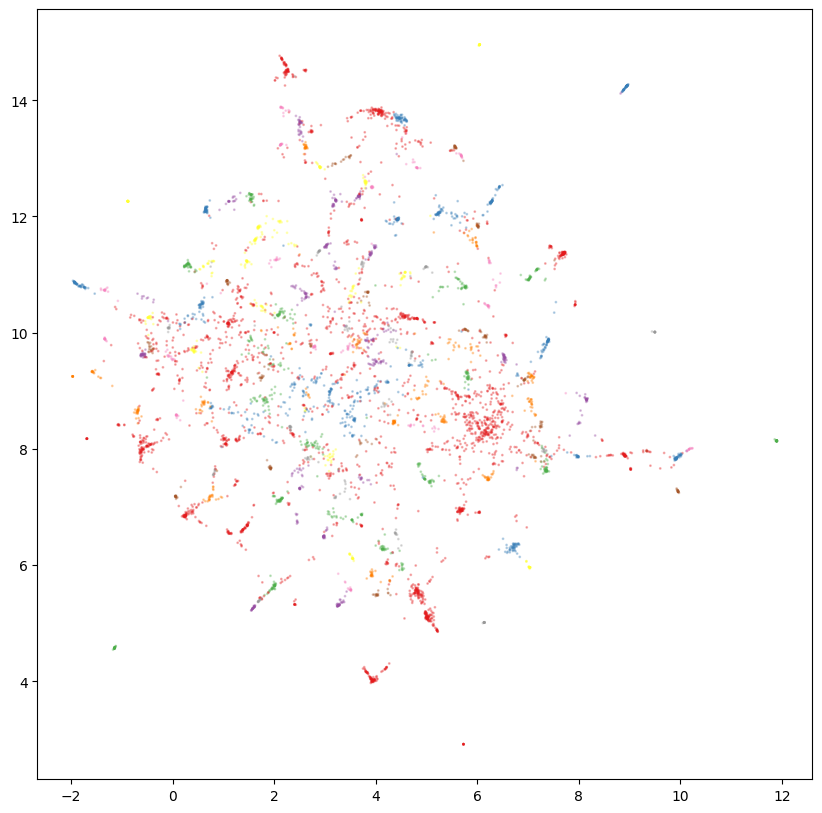

In [3]:
import matplotlib.pyplot as plt
from umap import UMAP
%matplotlib inline

docs["clean_text"] = docs["tag_action"].str.lower()

umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=1)

topic_model = BERTopic(embedding_model="stsb-mpnet-base-v2", umap_model=umap_model)

topics, _ = topic_model.fit_transform(docs["clean_text"])

freq_topics = topic_model.get_topic_info() 
print(freq_topics)

# Then, we extract the embeddings for each document
embeddings = topic_model._extract_embeddings(docs["clean_text"], method="document")

# Reducing dimensionality to 2d -> Play around with n_neighbors and min_dist
# Note that these 2D embeddings are very sensitive to hyperparameters
umap_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=1).fit_transform(embeddings)

# Combine data
df = pd.DataFrame(umap_embeddings, columns=["x", "y"])
df["topic"] = topics

# Visualize topics
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['x'], df['y'], c=df['topic'], s=1, alpha=.3, cmap="Set1")
plt.show()

In [4]:
freq_topics = topic_model.get_topic_info() 
freq_topics

,Topic,Count,Name
0,-1,1248,-1_for_interview_run_take
1,0,219,0_article_content_writing_paper
2,1,81,1_replace_developer_human_writer
3,2,72,2_language_translate_speak_natural
4,3,71,3_question_answer_query_interview
...,...,...,...
147,146,11,146_fiction_porn_fan_erotic
148,147,11,147_rest_break_chill_coffee
149,148,10,148_workout_practice_training_routine
150,149,10,149_intent_sense_comprehend_proper


In [5]:
df["task"] = docs["tag_action"]

In [6]:
df

,x,y,topic,task
0,8.878723,7.911425,13,write a poem
1,4.846786,5.507545,15,write code
2,6.519525,9.541348,52,write an essay
3,9.929351,7.845854,25,write a song
4,4.085166,13.801633,3,answer questions
...,...,...,...,...
5549,5.354544,8.575816,82,write you statement
5550,6.346941,8.659233,0,write you text
5551,6.556402,9.929581,-1,write you thesis
5552,6.400236,8.590774,0,write you work


In [ ]:
df.to_csv("tasks_topics_coordinates.csv")